# Loading data

In [2]:
import sys
import numpy as np
import sounddevice as sd  # To play the audio
import os


sys.path.append("/Users/carlosedm10/projects/college/TDS")
import utils
from scipy.io import wavfile
from matplotlib import pyplot as plt
from PIL import Image


# Path to the .wav files
audio = "/Users/carlosedm10/projects/college/TDSC/Files/v1.wav"
audio_ve = "/Users/carlosedm10/projects/college/TDSC/Files/v_e.wav"
audio_vs = "/Users/carlosedm10/projects/college/TDSC/Files/v_s.wav"
audio_vt1 = "/Users/carlosedm10/projects/college/TDSC/Files/vt1.wav"
audio_clarinete = "/Users/carlosedm10/projects/college/TDSC/Files/clarinete.wav"

audios = [audio, audio_ve, audio_vs, audio_vt1, audio_clarinete]

image_1 = "/Users/carlosedm10/projects/college/TDSC/Files/i1.png"
image_2 = "/Users/carlosedm10/projects/college/TDSC/Files/i2.png"
image_3 = "/Users/carlosedm10/projects/college/TDSC/Files/i3.png"
image_4 = "/Users/carlosedm10/projects/college/TDSC/Files/i4.png"

images = [image_1, image_2, image_3, image_4]

### Auxiliary functions

In [3]:
def _tone_frequency(audio_data, freq):
    """
    This method calculates the frequency of the tone in the audio data using FFT.
    """
    # Get the frequency of the tone
    tone = np.fft.fft(audio_data)  # Apply Fast Fourier Transform to the audio data
    tone = np.abs(tone)  # Take the absolute value of the Fourier transformed data
    tone = tone[: len(tone) // 2]  # Take only the positive frequencies.
    tone = tone / tone.max()  # Normalize the data
    tone_freq = (
        np.argmax(tone) * freq / len(tone)
    )  # Find the index of the maximum value and convert it to frequency
    return tone_freq

# Exercise 1. Audio Basics

---------- Audio 1 analysis ----------
Number of channels: 1
Sampling frequency: 16000
Sampling period: 6.25e-05
Bits per sample:  64
Bit rate: 1024.0 kbps
Data type: float64
The data type of the elements is double (float64).


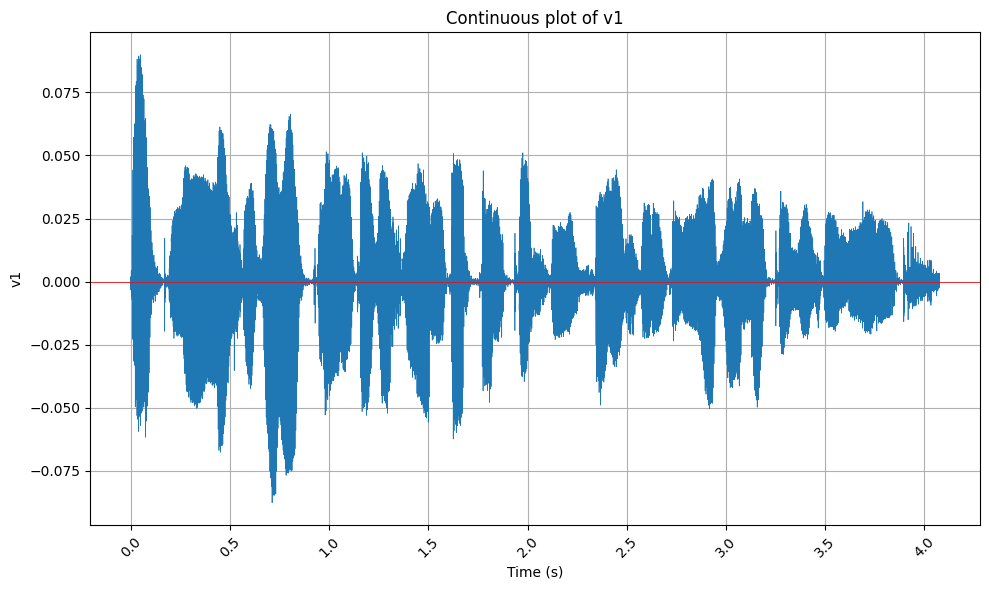

---------- Audio 2 analysis ----------
Number of channels: 1
Sampling frequency: 16000
Sampling period: 6.25e-05
Bits per sample:  64
Bit rate: 1024.0 kbps
Data type: float64
The data type of the elements is double (float64).


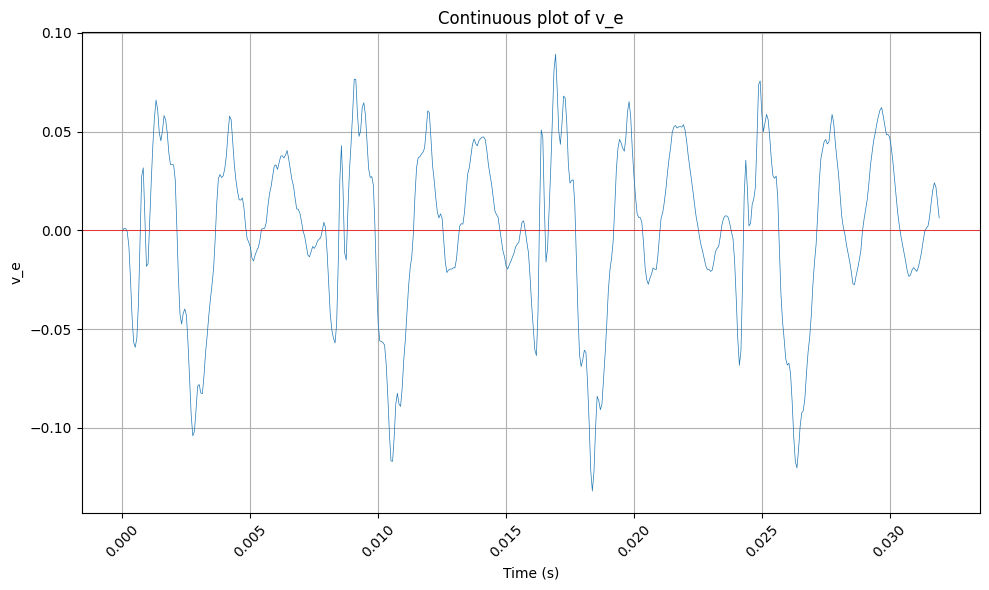

---------- Audio 3 analysis ----------
Number of channels: 1
Sampling frequency: 16000
Sampling period: 6.25e-05
Bits per sample:  64
Bit rate: 1024.0 kbps
Data type: float64
The data type of the elements is double (float64).


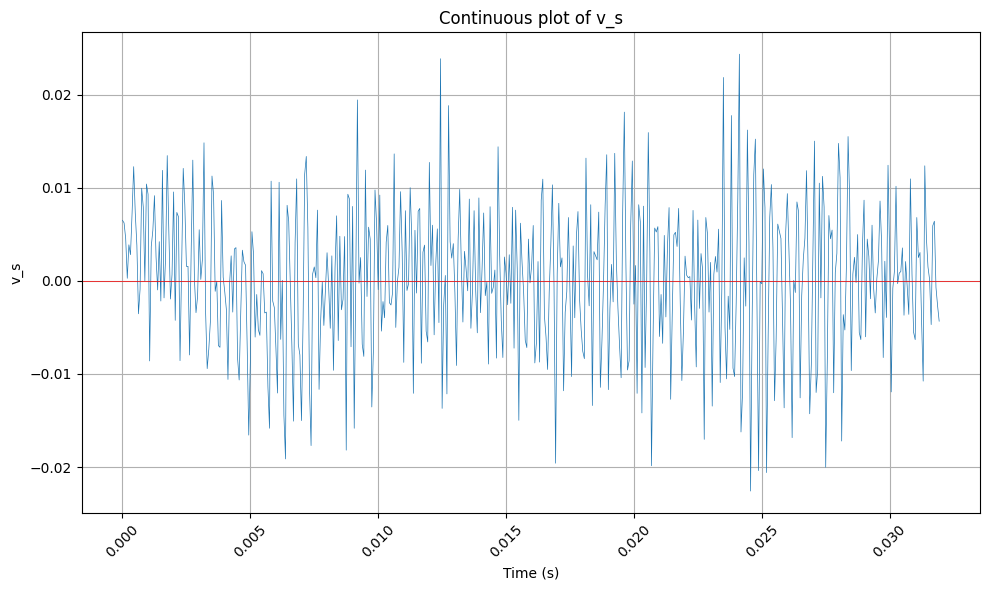

---------- Audio 4 analysis ----------
Number of channels: 1
Sampling frequency: 8000
Sampling period: 0.000125
Bits per sample:  64
Bit rate: 512.0 kbps
Data type: float64
The data type of the elements is double (float64).


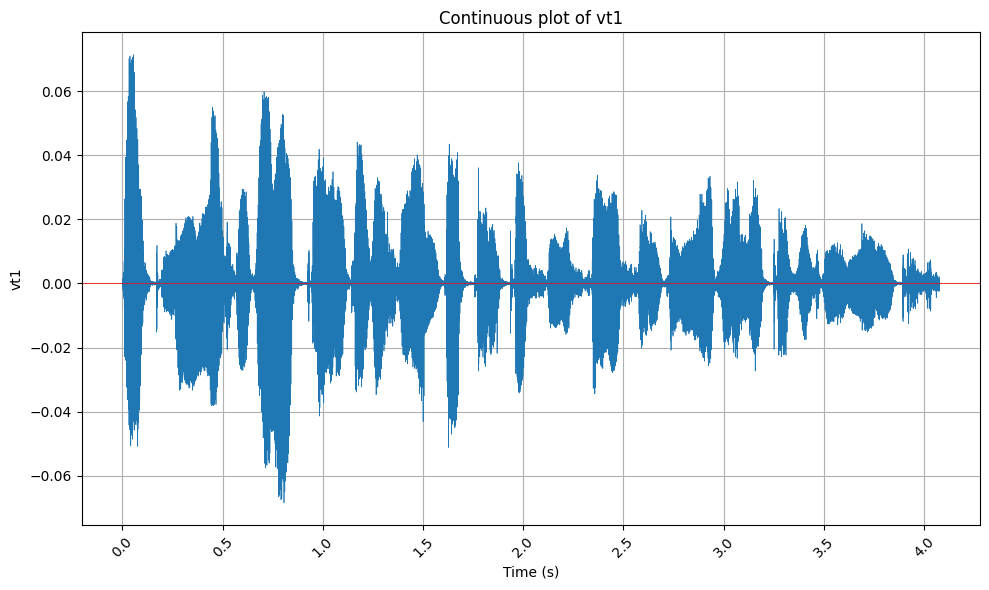

---------- Audio 5 analysis ----------
Audio is stereo, converting to mono
Number of channels: 2
Sampling frequency: 44100
Sampling period: 2.2675736961451248e-05
Bits per sample:  64
Bit rate: 2822.4 kbps
Data type: float64
The data type of the elements is double (float64).


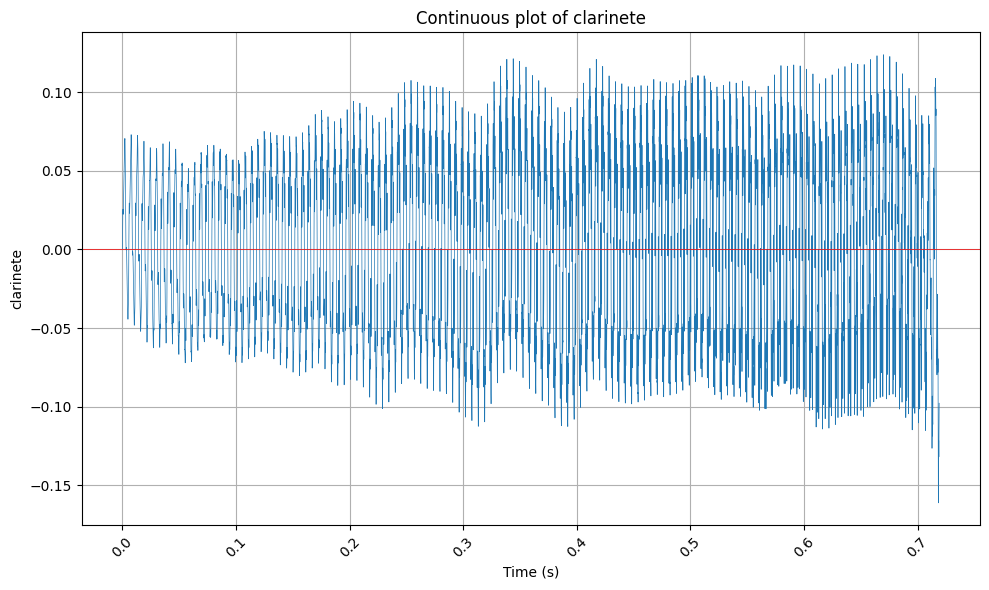

In [4]:
for n, audio in enumerate(audios):
    print("-" * 10, f"Audio {n+1} analysis", "-" * 10)
    freq, audio_data = wavfile.read(audio)
    audio_data = audio_data / 2**15  # Normalize the data
    time_vector = np.arange(len(audio_data)) / freq

    # Number of channels
    if audio_data.ndim == 1:
        n_channels = 1  # Mono
    else:
        n_channels = audio_data.shape[1]  # Stereo
        print("Audio is stereo, converting to mono")
        audio_data = audio_data.mean(axis=1)

    print(f"Number of channels: {n_channels}")

    # Sampling frequency of the audio
    print(f"Sampling frequency: {freq}")

    # Sampling period
    print(f"Sampling period: {1/freq}")

    # Binary rate bits/sample
    print(f"Bits per sample: ", audio_data.dtype.itemsize * 8)

    print(f"Bit rate: {audio_data.dtype.itemsize * 8 * freq / 1000} kbps")

    # Check if the data type of the elements is double (float64)
    print(f"Data type: {audio_data.dtype}")
    if audio_data.dtype == np.float64:
        print("The data type of the elements is double (float64).")
    else:
        print("The data type of the elements is not double (float64).")

    utils.continuous_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        linewidth=0.5,
    )

    # sd.play(audio_data, freq)
    # sd.wait()

### 1.1. Checking for the fundamental tone

---------- Tone frequency analysis ----------
Tone frequency: 750.0 Hz


/var/folders/n2/bpxkh5j55nx3ym9bf5t445jw0000gn/T/ipykernel_45510/1399382638.py:12: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=512).
  plt.specgram(audio_data, Fs=freq, NFFT=1024, cmap="viridis")


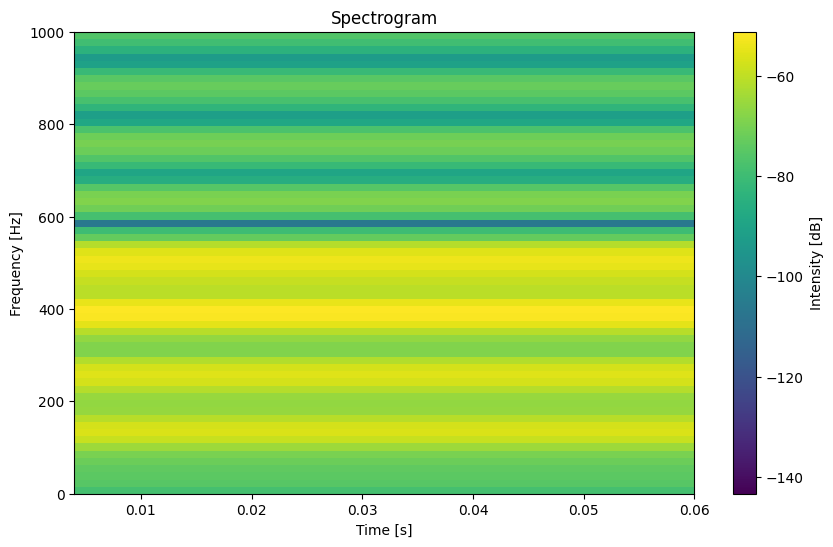

In [5]:
print("-" * 10, "Tone frequency analysis", "-" * 10)
freq, audio_data = wavfile.read(audio_ve)
fft = np.fft.fft(audio_data)
audio_data = audio_data / 2**15  # Normalize the data
tone_freq = _tone_frequency(audio_data, freq)
print(f"Tone frequency: {tone_freq} Hz")

# Seeing the spectrogram


plt.figure(figsize=(10, 6))
plt.specgram(audio_data, Fs=freq, NFFT=1024, cmap="viridis")
plt.title("Spectrogram")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label="Intensity [dB]")
plt.ylim([0, 1000])
plt.show()

### Exercise 1.2. Checking stereo audio

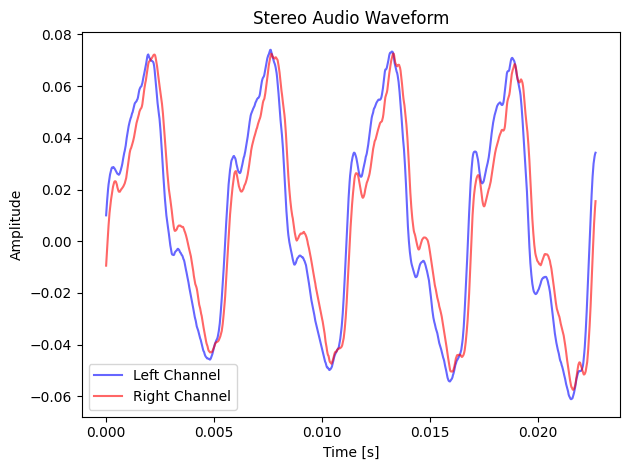

In [6]:
freq, audio_stereo = wavfile.read(audio_clarinete)
audio_stereo = audio_stereo / 2**15  # Normalize the data
num_samples = 1000

audio_stereo = audio_stereo[:num_samples]
time_vector = np.arange(len(audio_stereo)) / freq

time_vector = time_vector[:num_samples]


left_channel = audio_stereo[:, 0]
right_channel = audio_stereo[:, 1]

# Plot the left channel (in blue)
plt.plot(time_vector, left_channel, label="Left Channel", color="b", alpha=0.6)

# Plot the right channel (in red)
plt.plot(time_vector, right_channel, label="Right Channel", color="r", alpha=0.6)

# Add titles and labels
plt.title("Stereo Audio Waveform")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Add a legend to distinguish between channels
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Exercise 2. Image Basics

---------- Image 1 analysis ----------
Image shape: (708, 512, 3)
File size: 625728 bytes (5005824 bits)
Binary rate (bits per pixel): 13.81 bits/pixel


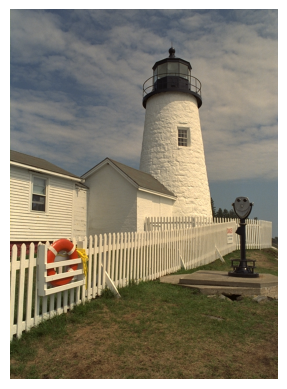

---------- Image 2 analysis ----------
Image shape: (512, 768, 3)
File size: 557596 bytes (4460768 bits)
Binary rate (bits per pixel): 11.34 bits/pixel


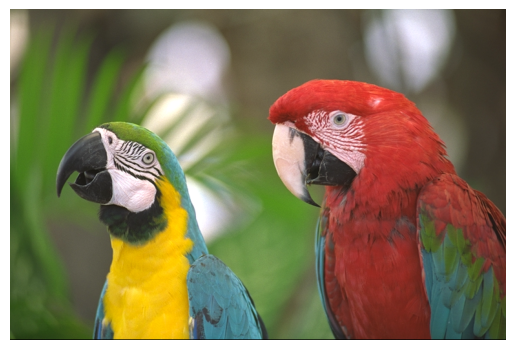

---------- Image 3 analysis ----------
Image shape: (768, 512, 3)
File size: 637432 bytes (5099456 bits)
Binary rate (bits per pixel): 12.97 bits/pixel


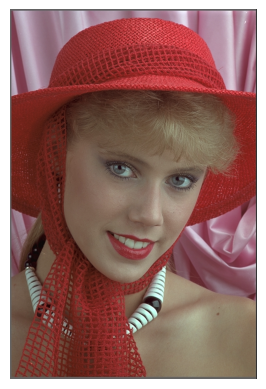

---------- Image 4 analysis ----------
Image shape: (494, 750, 3)
File size: 775876 bytes (6207008 bits)
Binary rate (bits per pixel): 16.75 bits/pixel


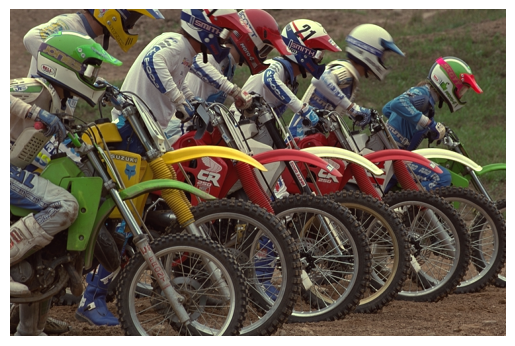

In [7]:
for image in images:
    print("-" * 10, f"Image {images.index(image)+1} analysis", "-" * 10)
    img = plt.imread(image)
    print(f"Image shape: {img.shape}")

    # Get image dimensions
    rows, cols, _ = (
        img.shape
    )  # rows (height), cols (width), and number of color channels

    # Number of pixels
    num_pixels = rows * cols

    # Calculate file size in bits
    file_size_bytes = os.path.getsize(image)  # File size in bytes
    file_size_bits = file_size_bytes * 8  # Convert to bits

    # Calculate binary rate (bits per pixel)
    bpp = file_size_bits / num_pixels

    print(f"File size: {file_size_bytes} bytes ({file_size_bits} bits)")
    print(f"Binary rate (bits per pixel): {bpp:.2f} bits/pixel")
    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### 1.1 RGB

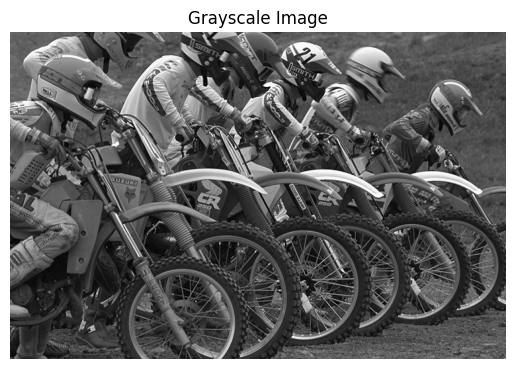

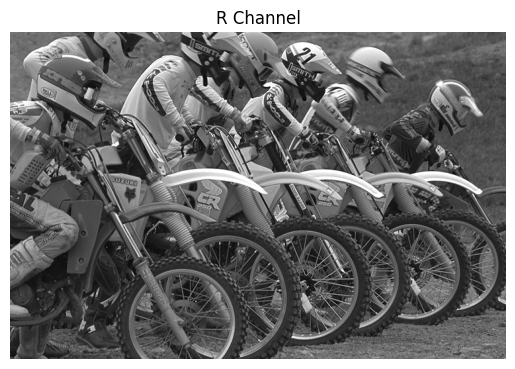

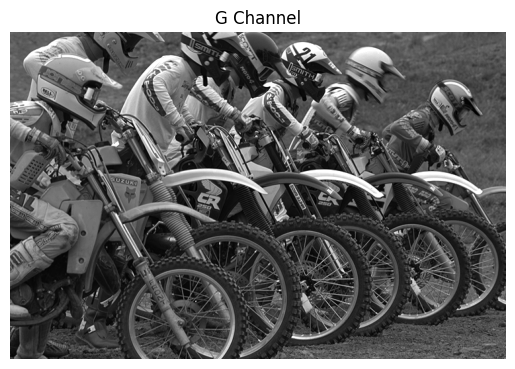

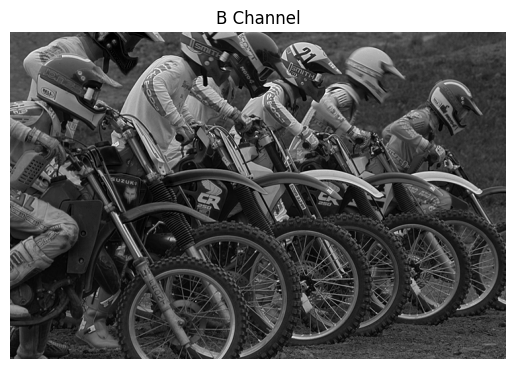

In [11]:
# Convert RGB to grayscale
rgb_image = np.array(img)

gray_image = np.dot(
    rgb_image[..., :3], [0.2989, 0.5870, 0.1140]
)  # Using standard luminance formula

plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

plt.imshow(rgb_image[:, :, 0], cmap="gray")
plt.title("R Channel")
plt.axis("off")
plt.show()

plt.imshow(rgb_image[:, :, 1], cmap="gray")
plt.title("G Channel")
plt.axis("off")
plt.show()

plt.imshow(rgb_image[:, :, 2], cmap="gray")
plt.title("B Channel")
plt.axis("off")
plt.show()

### 1.2. YCbCr Transformation

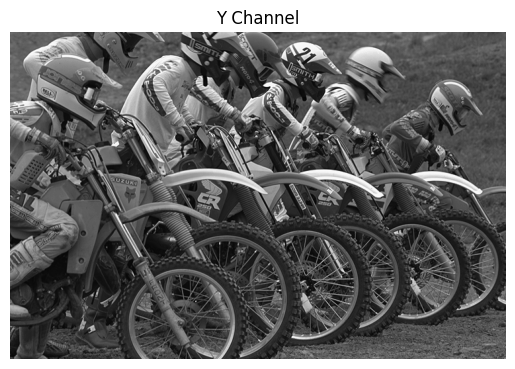

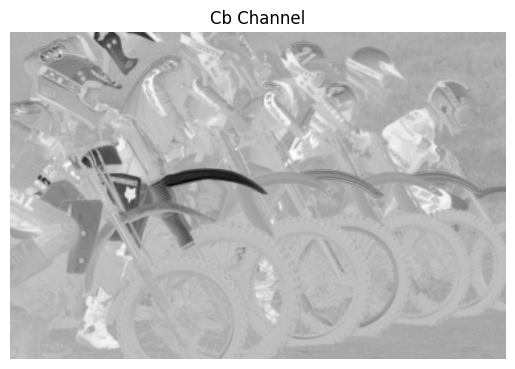

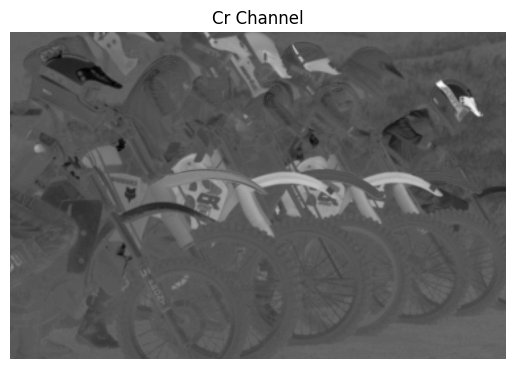

In [9]:
# Convert RGB to YCbCr
ycbcr_image = Image.open(image).convert("YCbCr")
ycbcr_image = np.array(ycbcr_image)

# Extract Y, Cb, and Cr components
Y_channel = ycbcr_image[:, :, 0]
Cb_channel = ycbcr_image[:, :, 1]
Cr_channel = ycbcr_image[:, :, 2]


# Display Y channel
plt.imshow(Y_channel, cmap="gray")
plt.title("Y Channel")
plt.axis("off")
plt.show()

# Display Cb channel
plt.imshow(Cb_channel, cmap="gray")
plt.title("Cb Channel")
plt.axis("off")
plt.show()

# Display Cr channel

plt.imshow(Cr_channel, cmap="gray")
plt.title("Cr Channel")
plt.axis("off")
plt.show()